In [28]:
# install.packages("influxdbclient")
# install.packages("latex2exp")


options(warn=-1)
install.packages("ggimage")

In [29]:
library(influxdbclient)
library(ggplot2)
library(openair)
library(dplyr)
library(lubridate)
library(nanotime)
library(ggimage)
library(latex2exp)

In [30]:
data <- data.frame(
  x = rep(1:2, each = 2),
  y = rep(2:1, 2),
  image = c("D:/UTD/UTDSummer2024/R files/icon1.png","D:/UTD/UTDSummer2024/R files/icon2.png")
)

In [31]:
data

x,y,image
<int>,<int>,<chr>
1,2,D:/UTD/UTDSummer2024/R files/icon1.png
1,1,D:/UTD/UTDSummer2024/R files/icon2.png
2,2,D:/UTD/UTDSummer2024/R files/icon1.png
2,1,D:/UTD/UTDSummer2024/R files/icon2.png


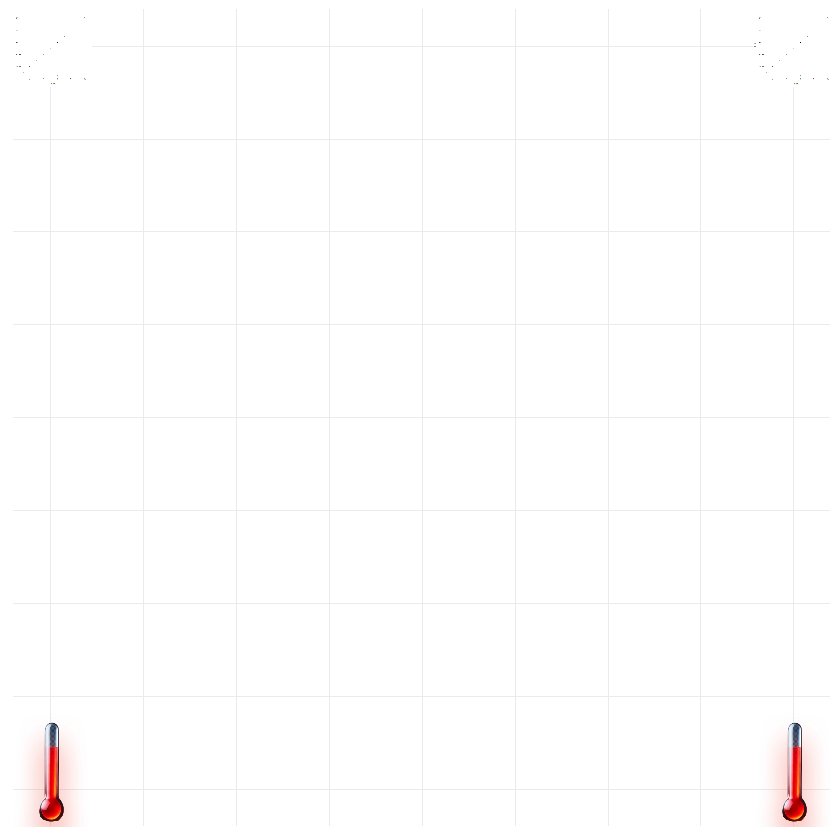

In [32]:
ggplot(data) +
  geom_image(aes(x = x, y = y, image = image), size = 0.1) +
  theme_minimal() +
  theme(axis.title = element_blank(), axis.text = element_blank(), axis.ticks = element_blank())

In [33]:
# client <- InfluxDBClient$new(
#   url = "http://mdash.circ.utdallas.edu:8086",
#   token = "4G3KpbuEGzN1zbo6V8UyF5Lk8MJ2BkUp69NiojUDyvVYtE-b9ACe_zb-1C4zkYYFB3431Tno7WMt3PAa4HVpMw==",
#   org = "MINTS"
# )

# # Define your start and end dates


# data <- client$query('from(bucket: "SharedAirDFW")|> range(start: 2024-06-23T00:00:00Z, stop: 2024-06-25T00:00:00Z)|> filter(fn: (r) => r["_measurement"] == "IPS7100" or r["_measurement"] == "BME280V2")|> filter(fn: (r) => r["_field"] == "pm2_5" or r["_field"] == "pm1_0" or r["_field"] == "temperature" or r["_field"] == "pressure" or r["_field"] == "humidity")|> filter(fn: (r) => r["device_id"] == "001e064a1520")|> filter(fn: (r) => r["device_name"] == "vaLo Node 01")|> aggregateWindow(every: 5m, fn: mean, createEmpty: false)|> yield(name: "mean")')

In [34]:
client <- InfluxDBClient$new(
  url = "http://mdash.circ.utdallas.edu:8086",
  token = "4G3KpbuEGzN1zbo6V8UyF5Lk8MJ2BkUp69NiojUDyvVYtE-b9ACe_zb-1C4zkYYFB3431Tno7WMt3PAa4HVpMw==",
  org = "MINTS"
)

raw_data = client$query('from(bucket: "SharedAirDFW")|> range(start: 2024-06-23T00:00:00Z, stop: 2024-06-23T23:59:59Z)|> filter(fn: (r) => r["device_id"] == "001e064a1520")|> filter(fn: (r) => r["device_name"] == "vaLo Node 01")|> filter(fn: (r) => r["_measurement"] == "WIMDA" or r["_measurement"] == "IPS7100" or r["_measurement"] == "BME280V2")|> filter(fn: (r) => r["_field"] == "altitude" or r["_field"] == "humidity" or r["_field"] == "dewPoint" or r["_field"] == "pm2_5"or r["_field"] == "pm10_0" or r["_field"] == "pressure" or r["_field"] == "temperature" or r["_field"] == "windAngleTrue" or r["_field"] == "windSpeedMetersPerSecond")|> aggregateWindow(every: 5m, fn: mean, createEmpty: false)|> yield(name: "raw")')

#  Print the raw data 
# print(raw_data)


In [35]:
# head(raw_data)

In [36]:
df = data.frame(time = raw_data[[1]]["_time"])

In [37]:
head(df)

,X_time
,<nanotime>
1,2024-06-23T00:05:00+00:00
2,2024-06-23T00:10:00+00:00
3,2024-06-23T00:15:00+00:00
4,2024-06-23T00:20:00+00:00
5,2024-06-23T00:25:00+00:00
6,2024-06-23T00:30:00+00:00


In [38]:
col_names = c("X_time")

In [39]:
# Storing the column names of variables in a list
for (i in 1:length(raw_data)){
   col_names[i+1] =  unique(raw_data[[i]]["_field"])[1,]
}
col_names

[1] "X_time"                   "altitude"                
 [3] "dewPoint"                 "humidity"                
 [5] "pressure"                 "temperature"             
 [7] "pm10_0"                   "pm2_5"                   
 [9] "dewPoint"                 "windAngleTrue"           
[11] "windSpeedMetersPerSecond"

In [40]:
count <- 1
for (c in col_names[2:length(col_names)]) {
    print(c)
    df[[c]] <- raw_data[[count]]["_value"][raw_data[[count]]["_field"] == c]
    count <- count + 1
}

[1] "altitude"
[1] "dewPoint"
[1] "humidity"
[1] "pressure"
[1] "temperature"
[1] "pm10_0"
[1] "pm2_5"
[1] "dewPoint"
[1] "windAngleTrue"
[1] "windSpeedMetersPerSecond"


In [41]:
head(df)

,X_time,altitude,dewPoint,humidity,pressure,temperature,pm10_0,pm2_5,windAngleTrue,windSpeedMetersPerSecond
,<nanotime>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2024-06-23T00:05:00+00:00,180.8030,20.00755,33.90698,991.7175,36.24635,2.119715,2.039423,108.19811,1.337736
2,2024-06-23T00:10:00+00:00,181.2560,19.52941,34.24737,991.6641,36.02464,2.419226,2.340732,80.04902,1.494118
3,2024-06-23T00:15:00+00:00,181.1681,20.09524,32.33599,991.6744,37.15535,2.104567,2.056962,114.54524,1.461905
4,2024-06-23T00:20:00+00:00,181.3105,20.11765,32.70457,991.6576,36.80254,2.011860,1.957867,99.42549,1.594118
5,2024-06-23T00:25:00+00:00,180.8647,20.14615,32.88469,991.7103,36.75424,2.168664,2.128851,104.45577,1.384615
6,2024-06-23T00:30:00+00:00,180.6456,20.06604,33.77002,991.7361,36.42508,2.167850,2.121774,113.92642,1.424528


In [42]:
df$X_time = as.POSIXct(df$X_time, origin = "1970-01-01",tz = "UTC")

In [43]:
df = df%>%rename(date = X_time,pm10 = pm10_0, wd = windAngleTrue, ws = windSpeedMetersPerSecond)
head(df)

,date,altitude,dewPoint,humidity,pressure,temperature,pm10,pm2_5,wd,ws
,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2024-06-23 00:05:00,180.8030,20.00755,33.90698,991.7175,36.24635,2.119715,2.039423,108.19811,1.337736
2,2024-06-23 00:10:00,181.2560,19.52941,34.24737,991.6641,36.02464,2.419226,2.340732,80.04902,1.494118
3,2024-06-23 00:15:00,181.1681,20.09524,32.33599,991.6744,37.15535,2.104567,2.056962,114.54524,1.461905
4,2024-06-23 00:20:00,181.3105,20.11765,32.70457,991.6576,36.80254,2.011860,1.957867,99.42549,1.594118
5,2024-06-23 00:25:00,180.8647,20.14615,32.88469,991.7103,36.75424,2.168664,2.128851,104.45577,1.384615
6,2024-06-23 00:30:00,180.6456,20.06604,33.77002,991.7361,36.42508,2.167850,2.121774,113.92642,1.424528


In [44]:
# df = df %>%
#   mutate(across(where(is.numeric), round))

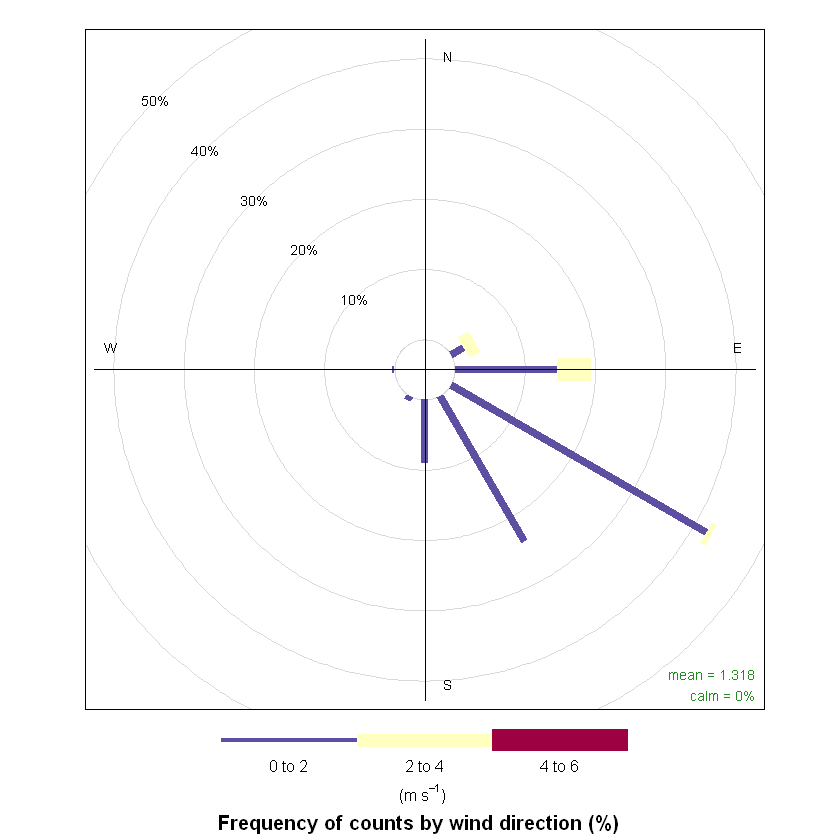

In [45]:
windRose(df)

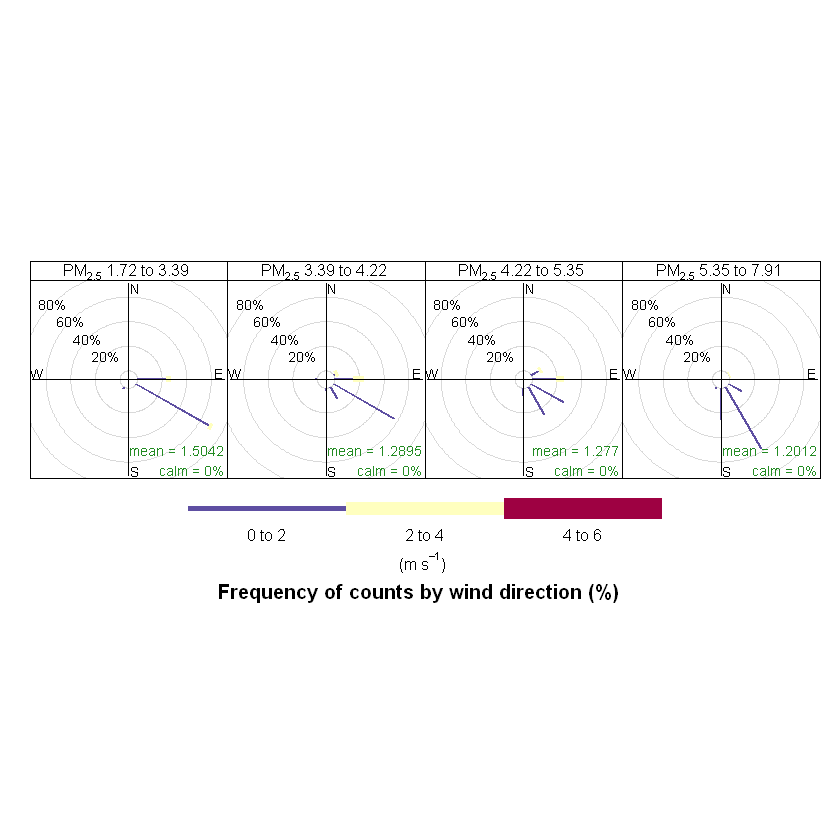

In [46]:
windRose(df,type = "pm2_5", layout = c(4, 1))

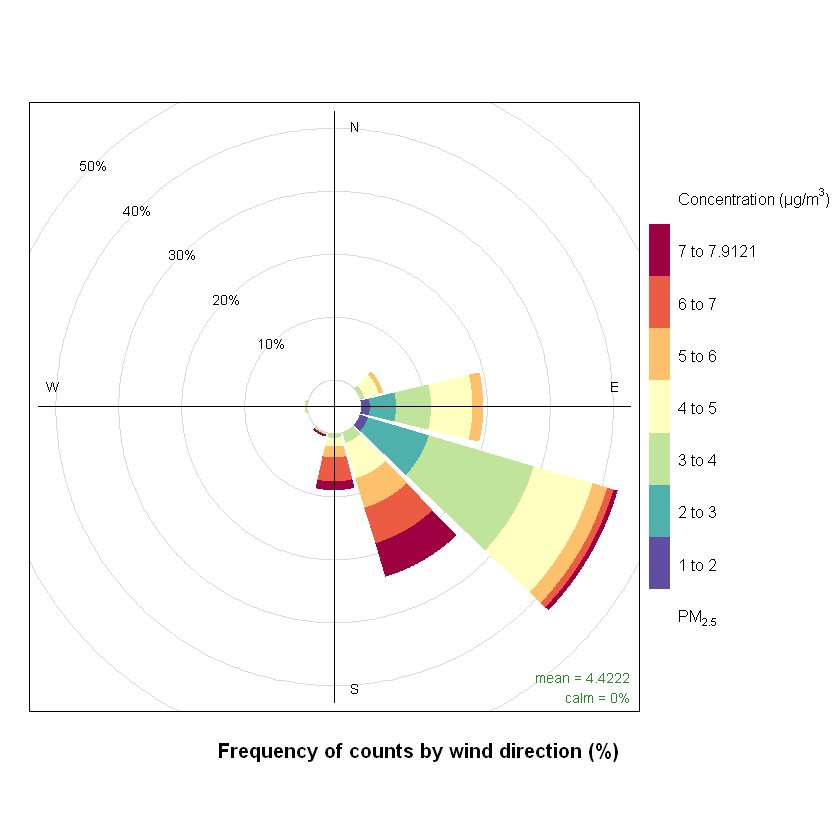

In [47]:
pollutionRose(df, pollutant = "pm2_5",key.header = TeX("Concentration (μg/m$^{3}$)"),)

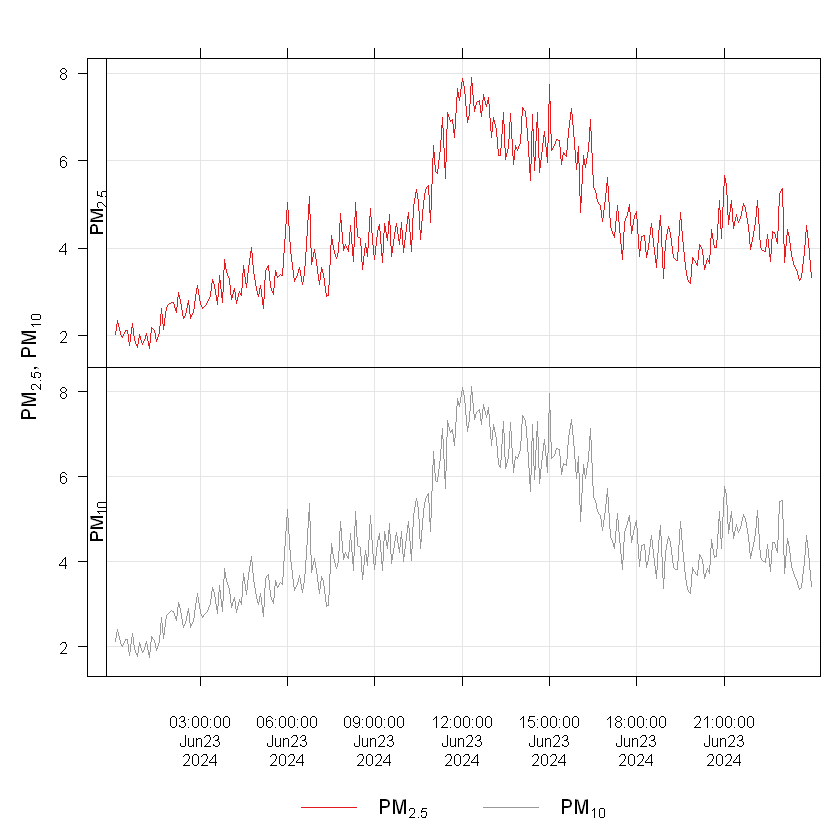

In [48]:
timePlot(df, pollutant = c( "pm2_5","pm10"),date.format = "\n%H:%M:%S\n%b%d\n%Y",y.relation = "free")

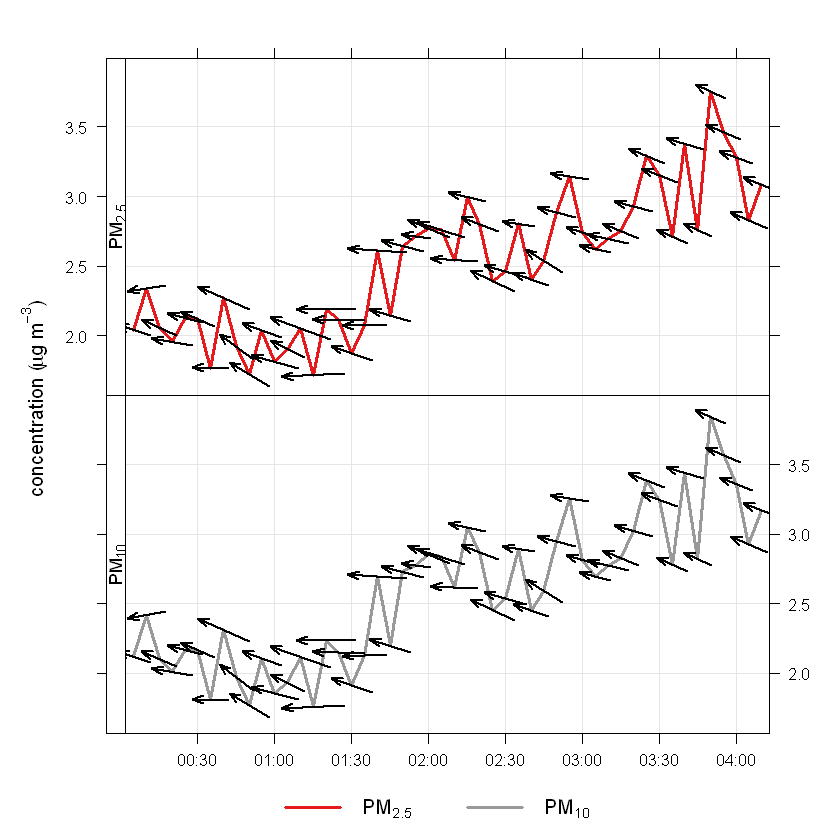

In [49]:
timePlot(head(df,50), pollutant = c("pm2_5", "pm10"),
windflow = list(scale = 0.1, lwd = 2, col = "black"),
lwd = 3, group = FALSE,
ylab = "concentration (ug/m3)")

In [50]:
head(df)

,date,altitude,dewPoint,humidity,pressure,temperature,pm10,pm2_5,wd,ws
,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2024-06-23 00:05:00,180.8030,20.00755,33.90698,991.7175,36.24635,2.119715,2.039423,108.19811,1.337736
2,2024-06-23 00:10:00,181.2560,19.52941,34.24737,991.6641,36.02464,2.419226,2.340732,80.04902,1.494118
3,2024-06-23 00:15:00,181.1681,20.09524,32.33599,991.6744,37.15535,2.104567,2.056962,114.54524,1.461905
4,2024-06-23 00:20:00,181.3105,20.11765,32.70457,991.6576,36.80254,2.011860,1.957867,99.42549,1.594118
5,2024-06-23 00:25:00,180.8647,20.14615,32.88469,991.7103,36.75424,2.168664,2.128851,104.45577,1.384615
6,2024-06-23 00:30:00,180.6456,20.06604,33.77002,991.7361,36.42508,2.167850,2.121774,113.92642,1.424528


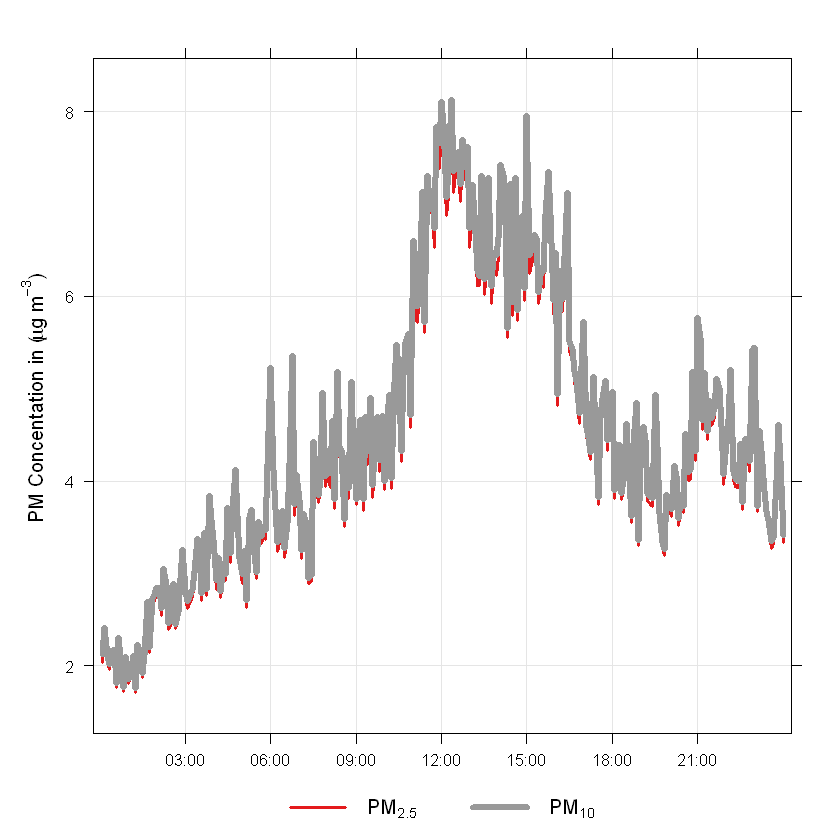

In [51]:
timePlot(df, 
         pollutant = c("pm2_5", "pm10"),
         group = TRUE,
         lty = 1, lwd = c(3, 5),
         ylab = "PM Concentation in (ug/m3)"
         )

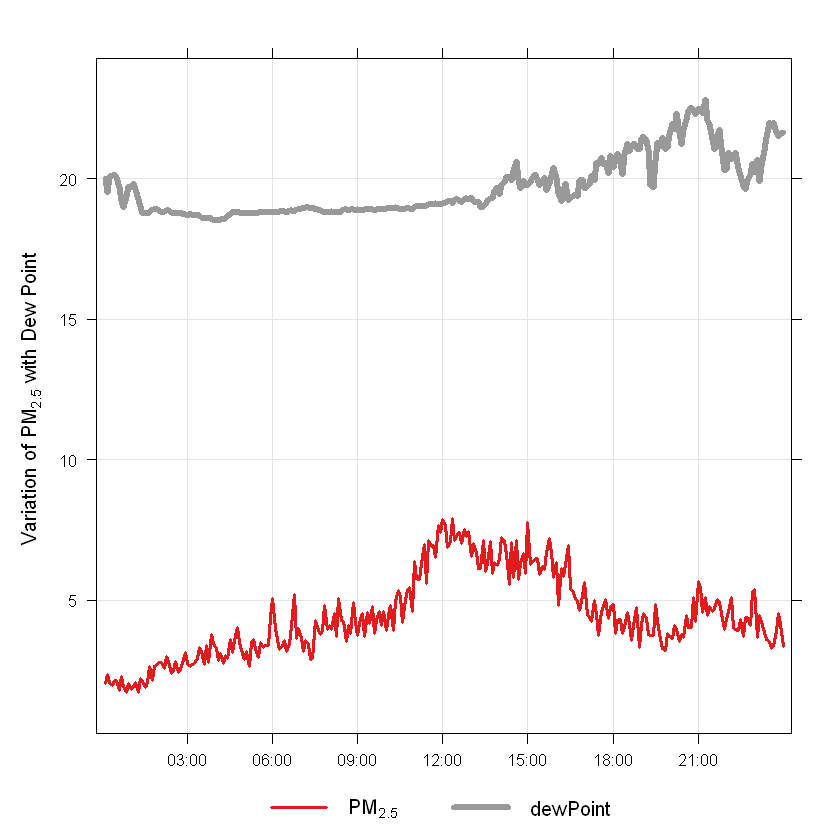

In [52]:
timePlot(df, 
         pollutant = c("pm2_5", "dewPoint"),
         group = TRUE,
         lty = 1, lwd = c(3, 5),
         ylab = "Variation of PM2_5 with Dew Point"
         )

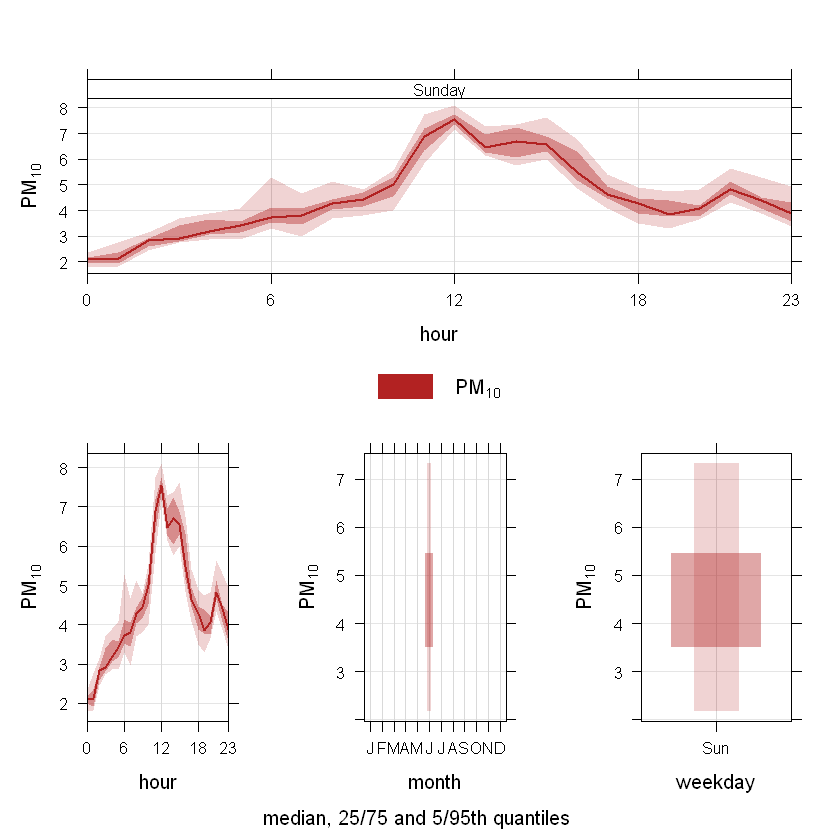

In [53]:
tv = timeVariation(df, pollutant = "pm10",statistic = "median",
              col = "firebrick")


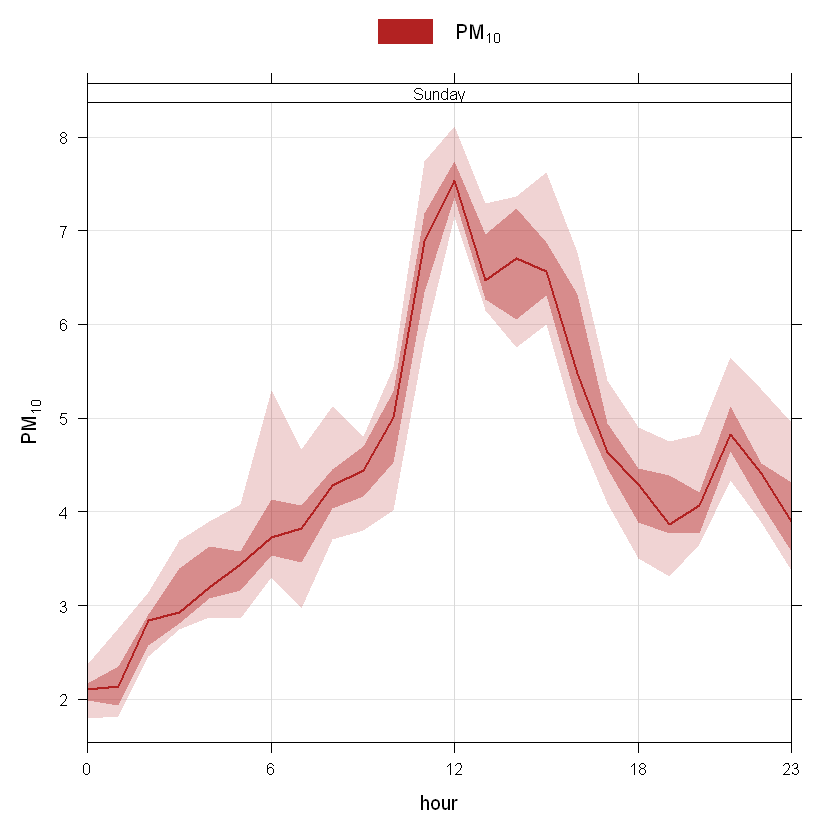

In [54]:
plot(tv, subset = "day.hour")

In [55]:
# head(df)

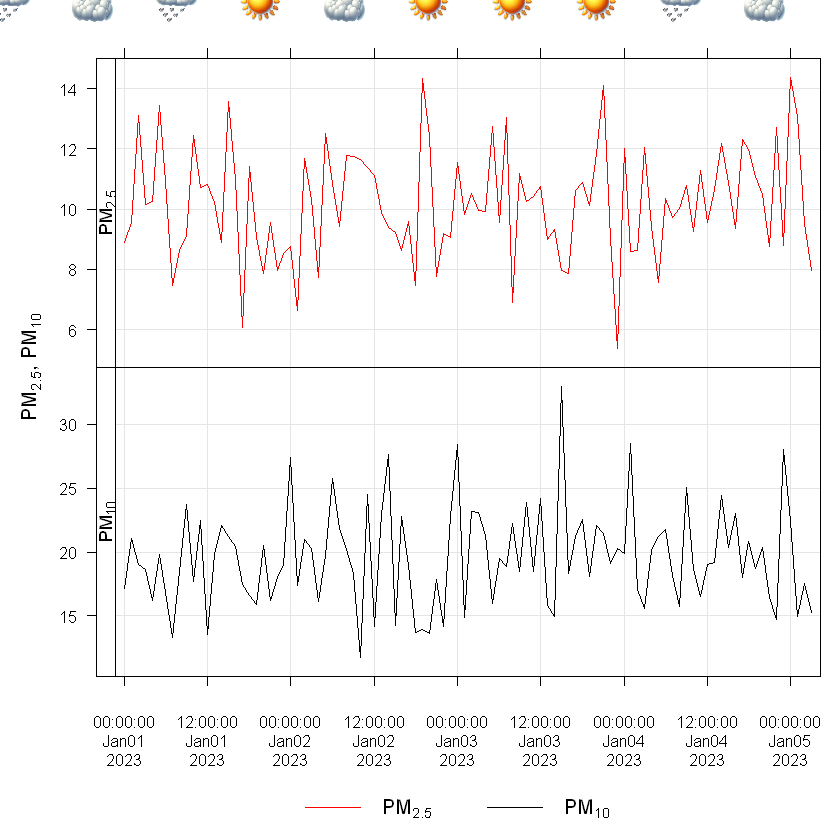

In [57]:
library(openair)
library(grid)
library(png)

# Sample data
set.seed(123)
df <- data.frame(
  date = seq(as.POSIXct("2023-01-01"), by = "hour", length.out = 100),
  pm2_5 = rnorm(100, 10, 2),
  pm10 = rnorm(100, 20, 4),
  weather = sample(c("sunny", "cloudy", "rainy"), 100, replace = TRUE)
)

# Load weather icons
sunny_icon <- readPNG("MINTS-Icons/WeatherIcons/Sunny.png")
cloudy_icon <- readPNG("MINTS-Icons/WeatherIcons/Cloudy.png")
rainy_icon <- readPNG("MINTS-Icons/WeatherIcons/HeavyRain.png")

# Create a function to plot weather icons
plot_weather_icons <- function(weather_condition) {
  icon <- switch(weather_condition,
                 "sunny" = sunny_icon,
                 "cloudy" = cloudy_icon,
                 "rainy" = rainy_icon)
  rasterGrob(icon, width = unit(0.05, "npc"), height = unit(0.05, "npc"))
}

# Create the timePlot
timePlot(df, pollutant = c("pm2_5", "pm10"), date.format = "\n%H:%M:%S\n%b%d\n%Y", y.relation = "free", col = c("red", "black"))

# # Extract time plot coordinates
# plot_coords <- grid.ls()

# Add weather icons every 10 iterations

for (i in seq(1, nrow(df), by = 10)) {
  weather_icon <- plot_weather_icons(df$weather[i])
  icon_x <- unit(i / nrow(df), "npc")
  icon_y <- unit(1, "npc")
  grid.draw(editGrob(weather_icon, vp = viewport(x = icon_x, y = icon_y, width = unit(1, "npc"), height = unit(1, "npc"))))
}